In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math

In [2]:
df = pd.read_csv('figure2h.csv')
data = df.drop(columns = ['raw.counts.D0','raw.counts.D6.IL2','raw.counts.D6.H9','raw.counts.D6.H9T','chrom','FDR (-10*log10 transformed)','symbol','summit','bindingTo','dist2TSS'])
#print(data)
newdata = data.T
#print(newdata) #drop the label column 
#logdata = np.log10(newdata)
#logdata = np.log2(newdata)
#print(logdata)
#updated = logdata.dropna(axis=0)

#print(len(newdata))
#newdata.shape()
#print(len(newdata[3]))
#na = logdata.isna()

#logdata.info()
for i in range(55200):
    for j in range(4):
        if newdata[i][j] == 0:
            newdata[i][j] = 1
            #print(i)
            #print(j)
logdata = np.log2(newdata)


In [3]:
print(newdata)

                      0         1         2         3          4      \
normalized.D0      3.832168  2.855341  2.554778  1.916084  10.594816   
normalized.D6.IL2  2.839392  3.199950  1.126743  2.118277  10.230825   
normalized.D6.H9   3.215382  2.956077  1.348386  2.593050  11.824307   
normalized.D6.H9T  3.293180  2.406554  1.013286  2.111013  11.737230   

                       5          6         7          8          9      ...  \
normalized.D0      12.623611  16.606060  0.488414  11.233511  20.250376  ...   
normalized.D6.IL2  17.351841  22.084161  1.847858   8.337897  21.272906  ...   
normalized.D6.H9   17.580877  23.285587  1.659552  10.372199  23.596753  ...   
normalized.D6.H9T  16.381458  19.632418  0.337762  11.061706  23.010038  ...   

                      55190     55191     55192     55193     55194     55195  \
normalized.D0      6.687508  1.916084  0.976827  1.465241  1.014397  0.864116   
normalized.D6.IL2  8.337897  1.712649  2.704183  8.923804  2.163346  0.72111

In [4]:
#X = np.concatenate(newdata, axis = 1) # combine data from all sites
#X = X.T
#print('Shape of X ', X.shape)

In [5]:
from sklearn.decomposition import PCA
sc = StandardScaler
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(newdata)
#results = [D0means,IL2means,H9means,H9Tmeans]
#print(results)
#print(D0means)
#meandata = pd.DataFrame([[D0means,IL2means,H9means,H9Tmeans]],columns = ['D0','IL2','H9','H9T'])

#print(meandata)
# finding principle components
pca = PCA(n_components = 2) # this defines the model, there are 4 features in the data 
p = pca.fit(logdata) # this fits the model
variance = pca.explained_variance_ratio_

In [6]:
print('Variance Explained: ', pca.explained_variance_ratio_)

Variance Explained:  [0.7701133 0.1921677]


In [7]:
#pc = pd.DataFrame(data = p, columns = ["PC1","PC2"])
#print(pc)
#logdata = np.log(pc)
#print(logdata)

Text(-100, -5, 'IL-2')

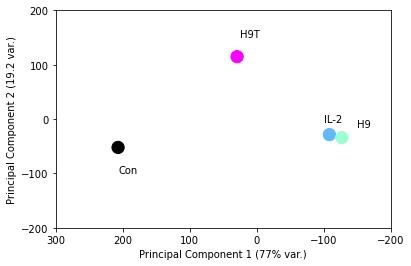

In [8]:
X_pca = pca.transform(logdata) # transform the data into PCA space
#print(X_pca)
plt.scatter(X_pca[:,0],X_pca[:,1], color = ['k','#61B8FD','#9CFFD2','magenta'],s=150)
#positions = [200,100,0,-100,-200]
#labels = ['-2','-1','0','1','2']
#plt.xticks(positions,labels)
#print(X_pca[0:1])
#print(X_pca)
plt.xlim(300, -200) #i flipped the axis to match they way the figure had it 
plt.ylim(-200,200)
ypos = [-200,-100,0,100,200]
#ylab = [-2,-1,0,1,2]
plt.yticks(ypos)
plt.xlabel('Principal Component 1 (77% var.)')
plt.ylabel('Principal Component 2 (19.2 var.)')

plt.annotate('Con',(206, -100))
plt.annotate('H9T', (25,150))
plt.annotate('H9', (-150,-15))
plt.annotate('IL-2', (-100,-5))
#print(X_pca[0:1])
#con = list(X_pca[0:1])
#print(con[0:1])